In [20]:
#爬取掏寶網

'\r\n<!DOCTYPE html>\n<html lang="zh-CN">\n<head>\n    <meta charset="UTF-8">\n    <meta http-equiv="X-UA-Compatible" content="IE=edge">\n    <meta name="renderer" content="webkit">\n    <meta name="data-spm" content="a230r">\n    <link rel="dns-prefetch" href="//g.alicdn.com">\n    <link rel="dns-prefetch" href="//assets.alicdn.com">\n    <link rel="dns-prefetch" href="//img.alicdn.com">\n    <link rel="dns-prefetch" href="//g-search1.alicdn.com">\n    <link rel="dns-prefetch" href="//g-search2.alicdn.com">\n    <link rel="dns-prefetch" href="//g-search3.alicdn.com">\n    <link rel="dns-prefetch" href="//g-search4.alicdn.com">\n    <link rel="dns-prefetch" href="//gtms01.alicdn.com">\n    <link rel="dns-prefetch" href="//gtms02.alicdn.com">\n    <link rel="dns-prefetch" href="//gtms03.alicdn.com">\n    <link rel="dns-prefetch" href="//gtms04.alicdn.com">\n    <link rel="shortcut icon" href="//www.taobao.com/favicon.ico">\n    <meta name="description" content="淘宝搜索是最智能的商品搜索引擎，通过大数据的运营，
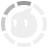

In [41]:
import requests
from bs4  import BeautifulSoup

url="https://s.taobao.com/search?spm=a21wu.241046-tw.6977698868.5.20a860c6Yqg19T&q=%E5%A5%B3%E8%A3%85&acm=lb-zebra-241046-2058600.1003.4.1797247&scm=1003.4.lb-zebra-241046-2058600.OTHER_14950676920071_1797247"
#url='https://s.taobao.com/search?q=%E5%A5%B3%E8%A3%85&imgfile=&js=1&stats_click=search_radio_all%3A1&initiative_id=staobaoz_20180313&ie=utf8'
#url = 'https://s.taobao.com/search?spm=a21wu.241046-tw.6977698868.151.4519fd50KYd7JM&q=%E9%A5%B0%E5%93%81DIY&acm=lb-zebra-241046-2075394.1003.4.1812236&scm=1003.4.lb-zebra-241046-2075394.OTHER_14952595482871_1812236'

res=requests.get(url)
res.text


### 網頁按右鍵後的檢查\Network\Doc\Response的內容複製到Notepad+去檢查是否有網頁上的價格
### 比如1926,299等，發現有包含則找對位置。接著看包含這個資訊的內容在哪裡?
### 可以看到是存在g_page_config的地方

In [42]:
soup = BeautifulSoup(res.text, "html.parser")
#for item in soup.select('.script'):
#    print (item.select('strong')[0].text)

In [43]:
# g_page_config
g_page_config = soup.select("script")[7].text
g_page_config

'\n        \n    g_page_config = {"pageName":"mainsrp","mods":{"shopcombotip":{"status":"hide"},"phonenav":{"status":"hide"},"debugbar":{"status":"hide"},"shopcombo":{"status":"hide"},"itemlist":{"status":"show","data":{"postFeeText":"运费","trace":"msrp_auction","auctions":[{"p4p":1,"p4pSameHeight":true,"nid":"562929656054","category":"","pid":"","title":"买就送钱包Vero Moda新款袖针织拼接连衣裙|31817C513","raw_title":"专区满3件送包Vero Moda七分袖针","pic_url":"//g-search1.alicdn.com/img/bao/uploaded/i4/imgextra/i2/17971277/TB2uHLFdpOWBuNjy0FiXXXFxVXa_!!0-saturn_solar.jpg","detail_url":"https://click.simba.taobao.com/cc_im?p\\u003d%C5%AE%D7%B0\\u0026s\\u003d224753292\\u0026k\\u003d505\\u0026e\\u003diDTHlVSMo6s6Eqr1SovuEoGD%2FQxG6ZqpDSiTpGJBojR%2BIh1XddA4SOXwDkMOw3jK63XiXP69zPH0vqIxb4lkC64J9EvHesZ47wdU8UlEomLzykn1VFVMKuQy8BMrXx186qxNUDhB9YEA7hhMpTUwJ1T%2BRiucA%2Ba%2Bgot1N9%2Fmu2vZlIaVJnPPbzdi7fb%2F%2BKxLKW35vuz1wPDoQtr5oZOb%2F4bi2xyChSnv847IUzCZQjOnyH85lYEFPdLZXms9rN%2FcTRNNVQomH1y%2FuCTNeehBkxMxxOafGnXJtYPexKM%2

In [28]:
# parse from g_page_config to json format
a = g_page_config.split('=')[1]   # a -> str
b = a.split('g_srp_loadCss()')[0] # b -> str
b = b[1:-6] # del the last 

# json
import json
jdata = json.loads(b)
print(type(jdata)) 
allNicks = jdata['mainInfo']['traceInfo']['traceData']['auctionNicks']
allPrice = jdata['mainInfo']['traceInfo']['traceData']['allPrices']
auctionPrices = jdata['mainInfo']['traceInfo']['traceData']['auctionPrices'] 
print('allNicks', len(allNicks), type(allNicks))
print('allPrice', len(allPrice), type(allNicks))
print('auctionPrices', len(auctionPrices), type(allNicks))

dict(zip(allNicks, auctionPrices))

<class 'dict'>
allNicks 36 <class 'list'>
allPrice 35 <class 'list'>
auctionPrices 36 <class 'list'>


{'%B4%F3%D4%D3%CD%C3': '9.80',
 '%B8%A3%CB%C9%C6%EC%BD%A2%B5%EA': '280.00',
 '%BA%C6%C8%BB%CB%AE%BE%A7%CA%CE%C6%B7%B5%EA': '24.50',
 '%C0%F6%E6%AD%C6%EC%BD%A2%B5%EA': '25.00',
 '%C1%C1%BE%A7%D4%B5%C6%EC%BD%A2%B5%EA': '7.50',
 '%C3%FB%E7%FC%C6%EC%BD%A2%B5%EA': '5.00',
 '%C5%C9%CF%B2%C6%EC%BD%A2%B5%EA': '25.00',
 '%C6%B7%D6%CA%CB%AE%BE%A7%C0%F1%C6%B7': '22.80',
 '%C7%A7%E7%F7%C6%EC%BD%A2%B5%EA': '9.90',
 '%C7%DA%B7%DC%C6%EC%BD%A2%B5%EA': '10.00',
 '%C7%E0%C0%B6%B6%E4%C6%EC%BD%A2%B5%EA': '12.80',
 '%C7%E5%D3%F0%D6%AE%C1%B5': '14.00',
 '%C8%F3%B3%BA%C6%EC%BD%A2%B5%EA': '23.80',
 '%D0%A1%C7%E5%D0%C2%CA%CE%BD%E7': '10.00',
 '%D1%A6%B3%FE%C5%F4': '10.00',
 '%D2%BB%CB%D8%D2%BB%CE%EF': '179.00',
 '%D2%C0%D2%BB%C5%B5%D2%BB': '1.20',
 '%D2%F8%C1%D6%CA%C0%BC%D2': '13.50',
 '%D3%F1%DC%B0%D6%E9%B1%A6%C6%EC%BD%A2%B5%EA': '10.00',
 '%D4%C2%CF%FA%C1%BF1181': '200.00',
 '%D4%E7%D4%C2diy': '18.90',
 '%E2%F9%DC%BD%C6%EC%BD%A2%B5%EA': '25.00',
 '%E7%B2%C2%FC%C6%EC%BD%A2%B5%EA': '25.00',
 '%E7%F7%BD%A8%C6%E